<center>
<img src="./pict/pandas_logo.jpg">
<br />
<br />

In [2]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [3]:
# https://www.kaggle.com/c/titanic/data - датасет для анализа
data = pd.read_csv('train.csv') 

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Family       891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
100 * (data.Ticket.nunique() / data.PassengerId.nunique())

76.43097643097643

In [7]:
100 * (data.Cabin.nunique() / data.PassengerId.nunique())

16.4983164983165

####   Параметр "Ticket" может быть исключен исходя из нашего анализа, поскольку он не содержит полезной информации, в силу,  наличия большого количества дупликатов. Номером кабины (параметр "Cabin") также можно пренебречь, так как этот столбец не заполнен для значительного числа пассажиров (лишь для 16,5% номер кабины известен). PassengerId не может быть исключен из набора данных, поскольку будет в дальнейшем использоваться для анализа. Name не может способствовать выживанию, но данный параметр необходим для определения титула.

In [35]:
data.drop(columns=['Cabin', 'Ticket'],axis=1, inplace = True)

In [5]:
data.loc[:,'Embarked'].replace(['C','S','Q'],['Cherbourg','Southampton','Queenstown'],inplace=True)
descript.loc[:,'Survived'].replace([0,1],['Did not make it','Yes'],inplace=True)

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
data.drop_duplicates().shape

(891, 10)

In [4]:
data['Family'] = data['SibSp'] + data['Parch']
print('Количество пассажиров: ', data.PassengerId.nunique())
print('Общий процент выживших: {} %'.format(int(100 * data['Survived'].sum() / data.PassengerId.nunique())))

Количество пассажиров:  891
Общий процент выживших: 38 %


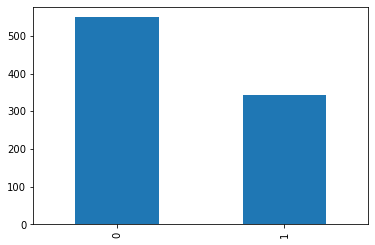

In [11]:
data.Survived.value_counts().plot(kind="bar")

In [38]:
print('Общий процент выживших женщин: {} %'.format(int(100 * data[data['Sex'] == 'female']['Survived'].sum() / data.PassengerId.nunique())))
print('Общий процент выживших мужчин: {} %'.format(int(100 * data[data['Sex'] == 'male']['Survived'].sum() / data.PassengerId.nunique())))
print('Общий процент выживших первого класса: {} %'.format(int(100 * data[data['Pclass'] == 1]['Survived'].sum() / data.PassengerId.nunique())))
print('Общий процент выживших второго класса: {} %'.format(int(100 * data[data['Pclass'] == 2]['Survived'].sum() / data.PassengerId.nunique())))
print('Общий процент выживших третьего класса: {} %'.format(int(100 * data[data['Pclass'] ==3]['Survived'].sum() / data.PassengerId.nunique())))
print('Общий процент выживших женщин первого класса: {} %'.format(int(100 * data[(data['Pclass'] == 1) & (data['Sex']=='female')]['Survived'].sum() / data.PassengerId.nunique())))
print('Общий процент выживших женщин второго класса: {} %'.format(int(100 * data[(data['Pclass'] == 2) & (data['Sex']=='female')]['Survived'].sum() / data.PassengerId.nunique())))
print('Общий процент выживших женщин третьего класса: {} %'.format(int(100 * data[(data['Pclass'] == 3) & (data['Sex']=='female')]['Survived'].sum() / data.PassengerId.nunique())))
print('Общий процент выживших мужчин первого класса: {} %'.format(int(100 * data[(data['Pclass'] == 1) & (data['Sex']=='male')]['Survived'].sum() / data.PassengerId.nunique())))
print('Общий процент выживших мужчин второго класса: {} %'.format(int(100 * data[(data['Pclass'] == 2) & (data['Sex']=='male')]['Survived'].sum() / data.PassengerId.nunique())))
print('Общий процент выживших мужчин третьего класса: {} %'.format(int(100 * data[(data['Pclass'] == 3) & (data['Sex']=='male')]['Survived'].sum() / data.PassengerId.nunique())))

Количество пассажиров:  891
Общий процент выживших: 38 %
Общий процент выживших женщин: 26 %
Общий процент выживших мужчин: 12 %
Общий процент выживших первого класса: 15 %
Общий процент выживших второго класса: 9 %
Общий процент выживших третьего класса: 13 %
Общий процент выживших женщин первого класса: 10 %
Общий процент выживших женщин второго класса: 7 %
Общий процент выживших женщин третьего класса: 8 %
Общий процент выживших мужчин первого класса: 5 %
Общий процент выживших мужчин второго класса: 1 %
Общий процент выживших мужчин третьего класса: 5 %


In [13]:
print('Общий процент выживших детей: {} %'.format(int(100 * data[(data['Age'] < 18)]['Survived'].sum() / data[(data['Age'] < 18)].PassengerId.nunique())))
print('Общий процент выживших взрослых: {} %'.format(int(100 * data[(data['Age'] >= 18) & (data['Age'] < 60)]['Survived'].sum() / data[(data['Age'] >= 18) & (data['Age'] < 60)].PassengerId.nunique())))
print('Общий процент выживших пожилых людей: {} %'.format(int(100 * data[(data['Age'] > 60)]['Survived'].sum() / data[(data['Age'] > 60)].PassengerId.nunique())))
print('Общий процент выживших девочек и девушек: {} %'.format(int(100 * data[(data['Age'] < 18) & (data['Sex'] == 'female')]['Survived'].sum() / data[(data['Age'] < 18) & (data['Sex'] == 'female')].PassengerId.nunique())))
print('Общий процент выживших женщин: {} %'.format(int(100 * data[(data['Age'] >= 18) & (data['Age'] < 60)& (data['Sex'] == 'female')]['Survived'].sum() / data[(data['Age'] >= 18) & (data['Age'] < 60) & (data['Sex'] == 'female')].PassengerId.nunique())))
print('Общий процент выживших пожилых женщин: {} %'.format(int(100 * data[(data['Age'] > 60) & (data['Sex'] == 'female')]['Survived'].sum() / data[(data['Age'] > 60) & (data['Sex'] == 'female')].PassengerId.nunique())))
print('Общий процент выживших мальчиков и юношей: {} %'.format(int(100 * data[(data['Age'] < 18) & (data['Sex'] == 'male')]['Survived'].sum() / data[(data['Age'] < 18) & (data['Sex'] == 'male')].PassengerId.nunique())))
print('Общий процент выживших мужчин: {} %'.format(int(100 * data[(data['Age'] >= 18) & (data['Age'] < 60)& (data['Sex'] == 'male')]['Survived'].sum() / data[(data['Age'] >= 18) & (data['Age'] < 60) & (data['Sex'] == 'male')].PassengerId.nunique())))
print('Общий процент выживших пожилых мужчин: {} %'.format(int(100 * data[(data['Age'] > 60) & (data['Sex'] == 'male')]['Survived'].sum() / data[(data['Age'] > 60) & (data['Sex'] == 'male')].PassengerId.nunique())))

Общий процент выживших детей: 53 %
Общий процент выживших взрослых: 38 %
Общий процент выживших пожилых людей: 22 %
Общий процент выживших девочек и девушек: 69 %
Общий процент выживших женщин: 76 %
Общий процент выживших пожилых женщин: 100 %
Общий процент выживших мальчиков и юношей: 39 %
Общий процент выживших мужчин: 17 %
Общий процент выживших пожилых мужчин: 10 %


#### Рассмотрим теперь зависимость от класса и возраста

In [14]:
print('Процент выживших в первом классе в зависимости от возраста и пола')
print('Общий процент выживших детей: {} %'.format(int(100 * data[(data['Age'] < 18) & (data['Pclass'] == 1)]['Survived'].sum() / data[(data['Age'] < 18) & (data['Pclass'] == 1)].PassengerId.nunique())))
print('Общий процент выживших взрослых: {} %'.format(int(100 * data[(data['Age'] >= 18) & (data['Age'] < 60) & (data['Pclass'] == 1)]['Survived'].sum() / data[(data['Age'] >= 18) & (data['Age'] < 60) & (data['Pclass'] == 1)].PassengerId.nunique())))
print('Общий процент выживших пожилых людей: {} %'.format(int(100 * data[(data['Age'] > 60) & (data['Pclass'] == 1)]['Survived'].sum() / data[(data['Age'] > 60) & (data['Pclass'] == 1)].PassengerId.nunique())))
print('Общий процент выживших девочек и девушек: {} %'.format(int(100 * data[(data['Age'] < 18) & (data['Sex'] == 'female')& (data['Pclass'] == 1)]['Survived'].sum() / data[(data['Age'] < 18) & (data['Sex'] == 'female') & (data['Pclass'] == 1)].PassengerId.nunique())))
print('Общий процент выживших женщин: {} %'.format(int(100 * data[(data['Age'] >= 18) & (data['Age'] < 60)& (data['Sex'] == 'female') & (data['Pclass'] == 1)]['Survived'].sum() / data[(data['Age'] >= 18) & (data['Age'] < 60) & (data['Sex'] == 'female') & (data['Pclass'] == 1)].PassengerId.nunique())))
print('Общий процент выживших пожилых женщин: {} %'.format(int(100 * data[(data['Age'] > 60) & (data['Sex'] == 'female') & (data['Pclass'] == 1)]['Survived'].sum() / data[(data['Age'] > 60) & (data['Sex'] == 'female') & (data['Pclass'] == 1)].PassengerId.nunique())))
print('Общий процент выживших мальчиков и юношей: {} %'.format(int(100 * data[(data['Age'] < 18) & (data['Sex'] == 'male') & (data['Pclass'] == 1)]['Survived'].sum() / data[(data['Age'] < 18) & (data['Sex'] == 'male') & (data['Pclass'] == 1)].PassengerId.nunique())))
print('Общий процент выживших мужчин: {} %'.format(int(100 * data[(data['Age'] >= 18) & (data['Age'] < 60) & (data['Sex'] == 'male') & (data['Pclass'] == 1)]['Survived'].sum() / data[(data['Age'] >= 18) & (data['Age'] < 60) & (data['Sex'] == 'male') & (data['Pclass'] == 1)].PassengerId.nunique())))
print('Общий процент выживших пожилых мужчин: {} %'.format(int(100 * data[(data['Age'] > 60) & (data['Sex'] == 'male') & (data['Pclass'] == 1)]['Survived'].sum() / data[(data['Age'] > 60) & (data['Sex'] == 'male') & (data['Pclass'] == 1)].PassengerId.nunique())))

Процент выживших в первом классе в зависимости от возраста и пола
Общий процент выживших детей: 91 %
Общий процент выживших взрослых: 67 %
Общий процент выживших пожилых людей: 21 %
Общий процент выживших девочек и девушек: 87 %
Общий процент выживших женщин: 97 %
Общий процент выживших пожилых женщин: 100 %
Общий процент выживших мальчиков и юношей: 100 %
Общий процент выживших мужчин: 40 %
Общий процент выживших пожилых мужчин: 8 %


In [15]:
print('Процент выживших во втором классе в зависимости от возраста и пола')
print('Общий процент выживших детей: {} %'.format(int(100 * data[(data['Age'] < 18) & (data['Pclass'] == 2)]['Survived'].sum() / data[(data['Age'] < 18) & (data['Pclass'] == 2)].PassengerId.nunique())))
print('Общий процент выживших взрослых: {} %'.format(int(100 * data[(data['Age'] >= 18) & (data['Age'] < 60) & (data['Pclass'] == 2)]['Survived'].sum() / data[(data['Age'] >= 18) & (data['Age'] < 60) & (data['Pclass'] == 2)].PassengerId.nunique())))
print('Общий процент выживших пожилых людей: {} %'.format(int(100 * data[(data['Age'] > 60) & (data['Pclass'] == 2)]['Survived'].sum() / data[(data['Age'] > 60) & (data['Pclass'] == 2)].PassengerId.nunique())))
print('Общий процент выживших девочек и девушек: {} %'.format(int(100 * data[(data['Age'] < 18) & (data['Sex'] == 'female')& (data['Pclass'] == 2)]['Survived'].sum() / data[(data['Age'] < 18) & (data['Sex'] == 'female') & (data['Pclass'] == 2)].PassengerId.nunique())))
print('Общий процент выживших женщин: {} %'.format(int(100 * data[(data['Age'] >= 18) & (data['Age'] < 60)& (data['Sex'] == 'female') & (data['Pclass'] == 2)]['Survived'].sum() / data[(data['Age'] >= 18) & (data['Age'] < 60) & (data['Sex'] == 'female') & (data['Pclass'] == 2)].PassengerId.nunique())))
print('Пожилых женщин не было во втором классе.')
print('Общий процент выживших мальчиков и юношей: {} %'.format(int(100 * data[(data['Age'] < 18) & (data['Sex'] == 'male') & (data['Pclass'] == 2)]['Survived'].sum() / data[(data['Age'] < 18) & (data['Sex'] == 'male') & (data['Pclass'] == 2)].PassengerId.nunique())))
print('Общий процент выживших мужчин: {} %'.format(int(100 * data[(data['Age'] >= 18) & (data['Age'] < 60) & (data['Sex'] == 'male') & (data['Pclass'] == 2)]['Survived'].sum() / data[(data['Age'] >= 18) & (data['Age'] < 60) & (data['Sex'] == 'male') & (data['Pclass'] == 2)].PassengerId.nunique())))
print('Общий процент выживших пожилых мужчин: {} %'.format(int(100 * data[(data['Age'] > 60) & (data['Sex'] == 'male') & (data['Pclass'] == 2)]['Survived'].sum() / data[(data['Age'] > 60) & (data['Sex'] == 'male') & (data['Pclass'] == 2)].PassengerId.nunique())))

Процент выживших во втором классе в зависимости от возраста и пола
Общий процент выживших детей: 91 %
Общий процент выживших взрослых: 41 %
Общий процент выживших пожилых людей: 33 %
Общий процент выживших девочек и девушек: 100 %
Общий процент выживших женщин: 90 %
Пожилых женщин не было во втором классе.
Общий процент выживших мальчиков и юношей: 81 %
Общий процент выживших мужчин: 5 %
Общий процент выживших пожилых мужчин: 33 %


In [16]:
print('Процент выживших в третьем классе в зависимости от возраста и пола')
print('Общий процент выживших детей: {} %'.format(int(100 * data[(data['Age'] < 18) & (data['Pclass'] == 3)]['Survived'].sum() / data[(data['Age'] < 18) & (data['Pclass'] == 3)].PassengerId.nunique())))
print('Общий процент выживших взрослых: {} %'.format(int(100 * data[(data['Age'] >= 18) & (data['Age'] < 60) & (data['Pclass'] == 3)]['Survived'].sum() / data[(data['Age'] >= 18) & (data['Age'] < 60) & (data['Pclass'] == 3)].PassengerId.nunique())))
print('Общий процент выживших пожилых людей: {} %'.format(int(100 * data[(data['Age'] > 60) & (data['Pclass'] == 3)]['Survived'].sum() / data[(data['Age'] > 60) & (data['Pclass'] == 3)].PassengerId.nunique())))
print('Общий процент выживших девочек и девушек: {} %'.format(int(100 * data[(data['Age'] < 18) & (data['Sex'] == 'female')& (data['Pclass'] == 3)]['Survived'].sum() / data[(data['Age'] < 18) & (data['Sex'] == 'female') & (data['Pclass'] == 3)].PassengerId.nunique())))
print('Общий процент выживших женщин: {} %'.format(int(100 * data[(data['Age'] >= 18) & (data['Age'] < 60)& (data['Sex'] == 'female') & (data['Pclass'] == 3)]['Survived'].sum() / data[(data['Age'] >= 18) & (data['Age'] < 60) & (data['Sex'] == 'female') & (data['Pclass'] == 3)].PassengerId.nunique())))
print('Общий процент выживших пожилых женщин: {} %'.format(int(100 * data[(data['Age'] > 60) & (data['Sex'] == 'female') & (data['Pclass'] == 3)]['Survived'].sum() / data[(data['Age'] > 60) & (data['Sex'] == 'female') & (data['Pclass'] == 3)].PassengerId.nunique())))
print('Общий процент выживших мальчиков и юношей: {} %'.format(int(100 * data[(data['Age'] < 18) & (data['Sex'] == 'male') & (data['Pclass'] == 3)]['Survived'].sum() / data[(data['Age'] < 18) & (data['Sex'] == 'male') & (data['Pclass'] == 3)].PassengerId.nunique())))
print('Общий процент выживших мужчин: {} %'.format(int(100 * data[(data['Age'] >= 18) & (data['Age'] < 60) & (data['Sex'] == 'male') & (data['Pclass'] == 3)]['Survived'].sum() / data[(data['Age'] >= 18) & (data['Age'] < 60) & (data['Sex'] == 'male') & (data['Pclass'] == 3)].PassengerId.nunique())))
print('Общий процент выживших пожилых мужчин: {} %'.format(int(100 * data[(data['Age'] > 60) & (data['Sex'] == 'male') & (data['Pclass'] == 3)]['Survived'].sum() / data[(data['Age'] > 60) & (data['Sex'] == 'male') & (data['Pclass'] == 3)].PassengerId.nunique())))

Процент выживших в третьем классе в зависимости от возраста и пола
Общий процент выживших детей: 37 %
Общий процент выживших взрослых: 20 %
Общий процент выживших пожилых людей: 20 %
Общий процент выживших девочек и девушек: 54 %
Общий процент выживших женщин: 40 %
Общий процент выживших пожилых женщин: 100 %
Общий процент выживших мальчиков и юношей: 23 %
Общий процент выживших мужчин: 13 %
Общий процент выживших пожилых мужчин: 0 %


#### Разберем более детально вопрос взаимосвязи возраста с выживанием с помощью гистограмм

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc113f54c70>,
      dtype=object)

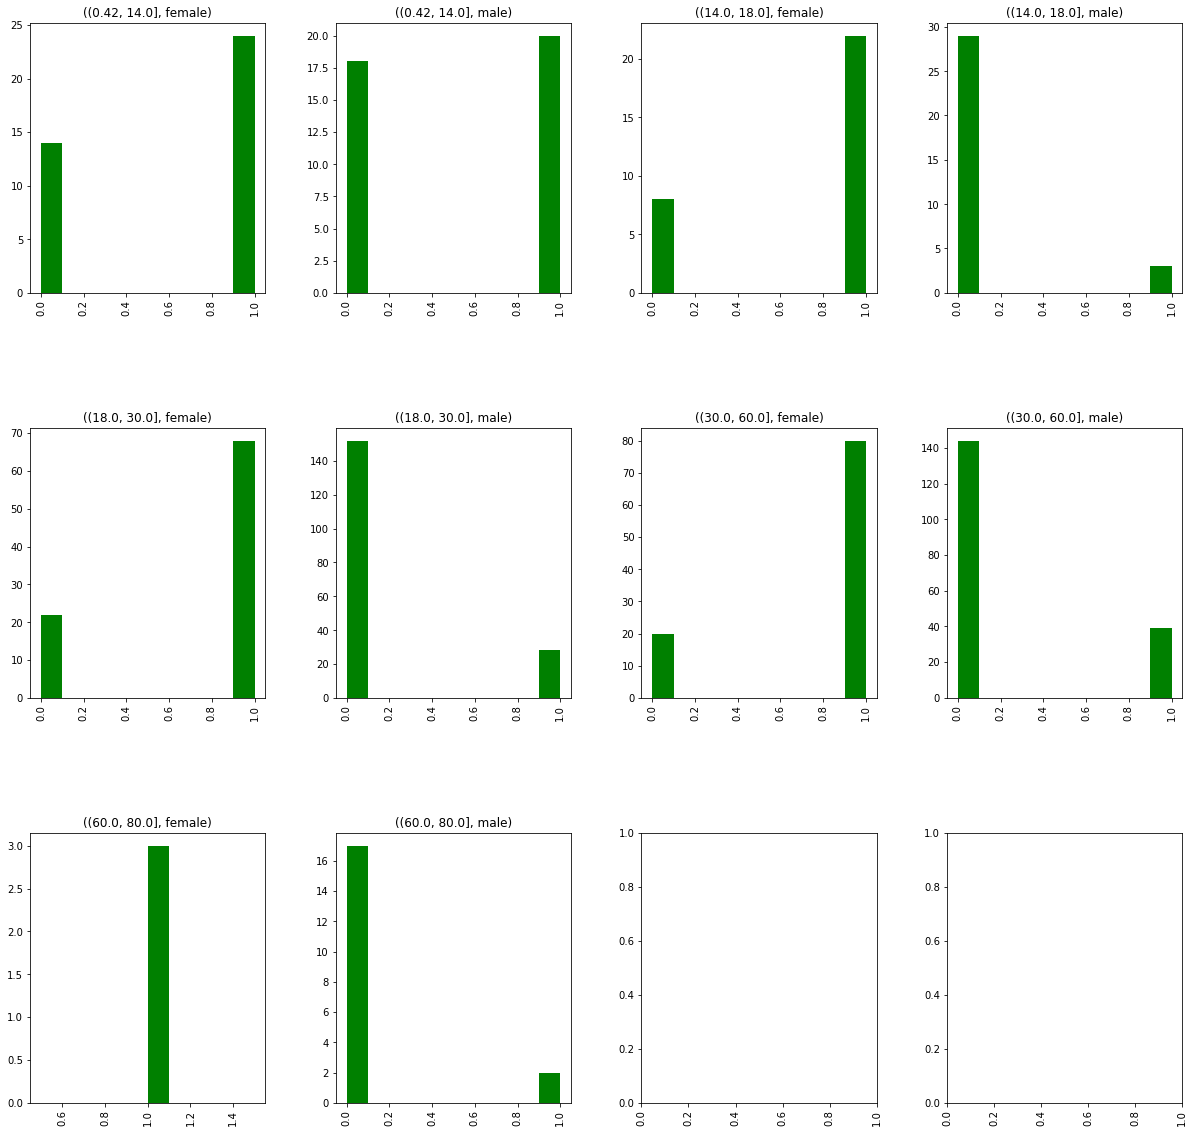

In [17]:
age_groups = [0.42,14,18,30,60,80]
data['age_group']=pd.cut(data['Age'],age_groups)
data[['age14','age18','age30','age60','age80']]=pd.get_dummies(data['age_group'])
data.hist("Survived", by=["age_group","Sex"], layout=[3,4], figsize = [20,20], color = 'green')


In [21]:
print('Процент выживания людей в зависимости от того, в каком порту они зашли на борт корабля.')
print('Общий процент выживших (порт Cherbourg): {} %'.format(int((100) * data[(data['Embarked'] == 'Cherbourg')]['Survived'].sum() / data[(data['Embarked'] == 'Cherbourg')].PassengerId.nunique())))
print('Общий процент выживших (порт Queenstown): {} %'.format(int(100 * data[(data['Embarked'] == 'Queenstown')]['Survived'].sum() / data[(data['Embarked'] == 'Queenstown')].PassengerId.nunique())))
print('Общий процент выживших (порт Southampton): {} %'.format(int(100 * data[(data['Embarked'] == 'Southampton')]['Survived'].sum() / data[(data['Embarked'] == 'Southampton')].PassengerId.nunique())))

Процент выживания людей в зависимости от того, в каком порту они зашли на борт корабля.
Общий процент выживших (порт Cherbourg): 55 %
Общий процент выживших (порт Queenstown): 38 %
Общий процент выживших (порт Southampton): 33 %


#### Отсюда видно, что фактор выживания в катастрофе определенно связан с полом, класс же, в свою очередь, по этим данным не влияет на выживания, возможно, что он все же в связи с каким-то фактор, как пол, например, и возрастом, так девочки и девушки в первом и во втором классе имели весьма неплохие шансы на выживыание, стоит проверить - является ли этот результат достоверным, для этого стоит оценить количество людей каждого из этих классов. По наших данным, однако, очевидно, что возраст - фактор, влияющий на выживаемость, у детей опредленно шанс на выживание намного выше, чем у взрослых, вне зависимости от класса. Удивительно также, что количество выживших связано с портом, в котором человек зашел на борт корабля. Моя теория заключается в том, что это может быть связано с классом и возрастом, а также полом, для каждого порта необходимо будет проверить эти значения. 

In [45]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Family           0
age_group      178
age14            0
age18            0
age30            0
age60            0
age80            0
dtype: int64

#### Что интересно, много данных отсутствует в таблице - для 177 пассажиров не указан возраст. Для кабин невозможно достоверно определить вероятность выживания, так как их анализ не предоставит достоверных результатов - 686 кабин не указаны в таблице.


#### Далее покажем на гистограмах количество выживших пассажиров в зависимости от одного параметра 

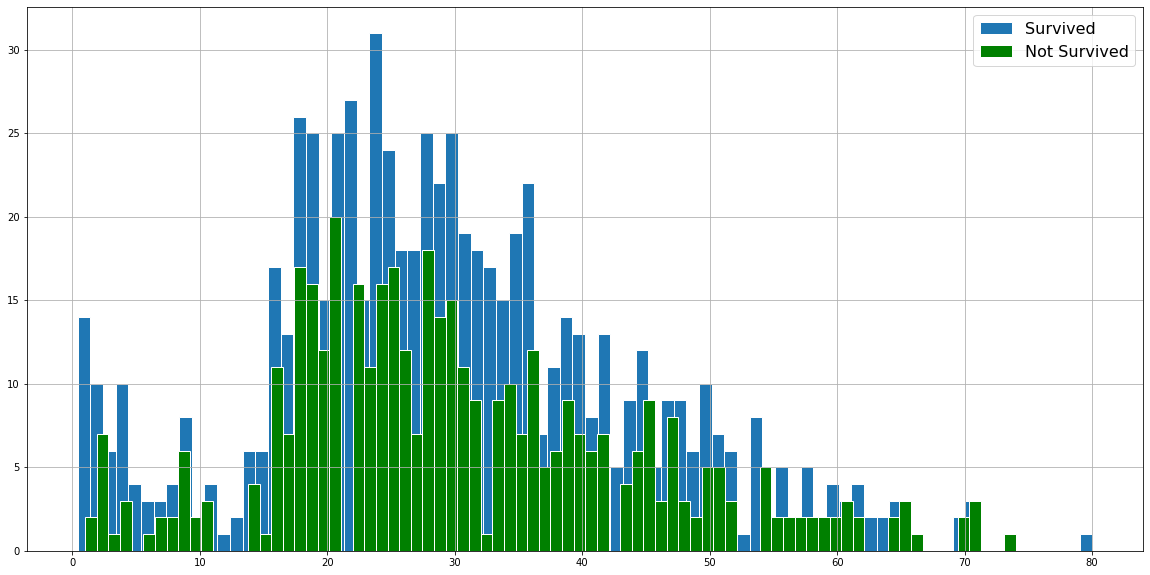

In [46]:
ax = data['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', grid=True)

data[data['Survived'] == 0]['Age'].hist(figsize=(20, 10), bins=80, 
                                          edgecolor='white', grid=True, color='green')
ax.legend(['Survived', 'Not Survived'], prop={'size':16})

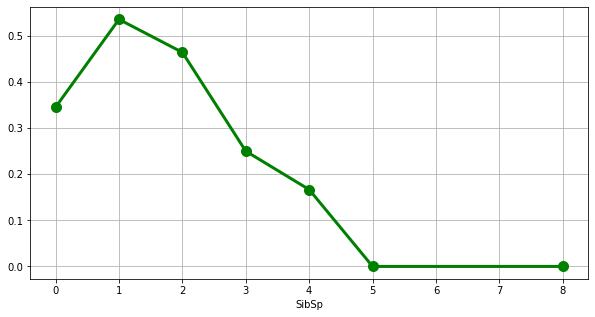

In [87]:
series = data.groupby(['SibSp'])['Survived'].sum() / data.groupby(['SibSp'])['Survived'].count()
series.plot(figsize=(10, 5), linestyle='-', marker='o', markersize=10, grid=True, lw=3, color = 'green')

#### Оптимальное количество родственников для выживание - 1 или 2.

#### Рассмотрим также более удобный способ представления наших данных в виде гистограммы

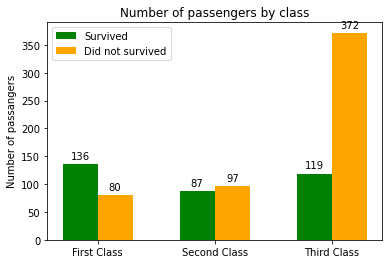

In [86]:
labels = ['First Class', 'Second Class', 'Third Class']
surv = (data[(data['Pclass'] == 1) & (data['Survived'] == 1)]['PassengerId'].count(),
             data[(data['Pclass'] == 2) & (data['Survived'] == 1)]['PassengerId'].count(),
              data[(data['Pclass'] == 3) & (data['Survived'] == 1)]['PassengerId'].count())
didntsurv = (data[(data['Pclass'] == 1) & (data['Survived'] == 0)]['PassengerId'].count(), 
              data[(data['Pclass'] == 2) & (data['Survived'] == 0)]['PassengerId'].count(),
               data[(data['Pclass'] == 3) & (data['Survived'] == 0)]['PassengerId'].count())


x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, surv, width, label='Survived', color='green')
rects2 = ax.bar(x + width/2, didntsurv, width, label='Did not survived',color='orange')
ax.set_ylabel('Number of passangers')
ax.set_title('Number of passengers by class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

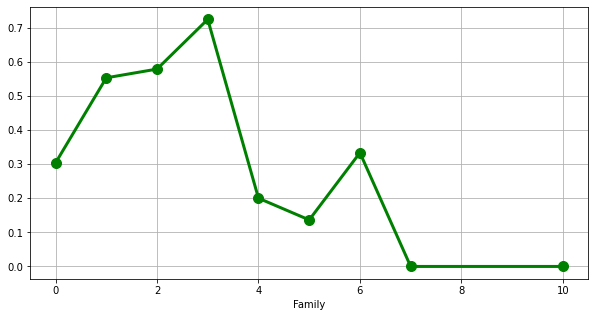

In [52]:
series = data.groupby(['Family'])['Survived'].sum() / data.groupby(['Family'])['Survived'].count()
series.plot(figsize=(10, 5), linestyle='-', marker='o', markersize=10, grid=True, lw=3, color = 'green')

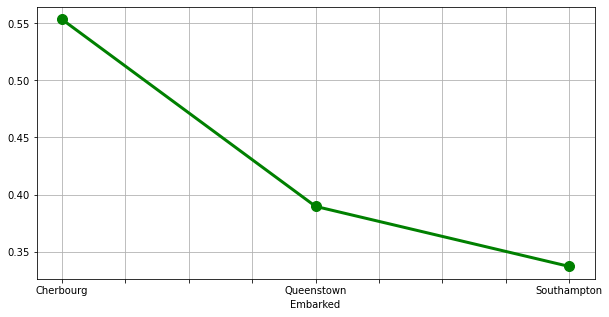

In [7]:
series = data.groupby(['Embarked'])['Survived'].sum() / data.groupby(['Embarked'])['Survived'].count()
series.plot(figsize=(10, 5), linestyle='-', marker='o', markersize=10, grid=True, lw=3, color = 'green')

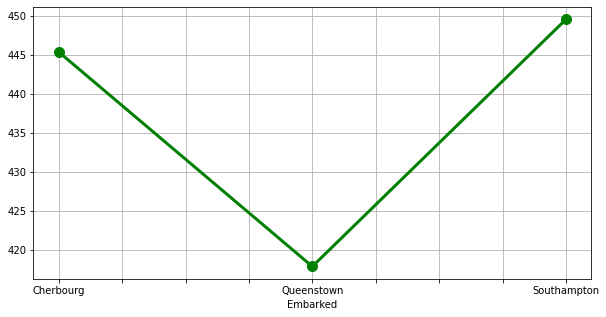

In [10]:
series = data.groupby(['Embarked'])['PassengerId'].sum() / data.groupby(['Embarked'])['PassengerId'].count()
series.plot(figsize=(10, 5), linestyle='-', marker='o', markersize=10, grid=True, lw=3, color = 'green')

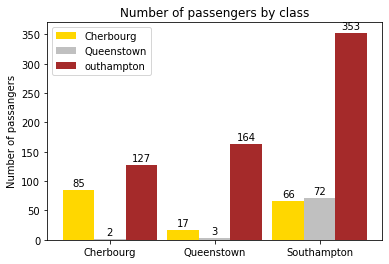

In [70]:
labels = ['Cherbourg', 'Queenstown', 'Southampton']
cherbourg = (data[(data['Pclass'] == 1) & (data['Embarked'] == 'Cherbourg')]['PassengerId'].count(), 
             data[(data['Pclass'] == 2) & (data['Embarked'] == 'Cherbourg')]['PassengerId'].count(), 
             data[(data['Pclass'] == 3) & (data['Embarked'] == 'Cherbourg')]['PassengerId'].count())
queenstown = (data[(data['Pclass'] == 1) & (data['Embarked'] == 'Queenstown')]['PassengerId'].count(), 
              data[(data['Pclass'] == 2) & (data['Embarked'] == 'Queenstown')]['PassengerId'].count(), 
              data[(data['Pclass'] == 3) & (data['Embarked'] == 'Queenstown')]['PassengerId'].count())
southampton = (data[(data['Pclass'] == 1) & (data['Embarked'] == 'Southampton')]['PassengerId'].count(), 
               data[(data['Pclass'] == 2) & (data['Embarked'] == 'Southampton')]['PassengerId'].count(), 
               data[(data['Pclass'] == 3) & (data['Embarked'] == 'Southampton')]['PassengerId'].count())

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, cherbourg, width, label='Cherbourg', color='gold')
rects2 = ax.bar(x, queenstown, width, label='Queenstown',color='silver')
rects3 = ax.bar(x + width, southampton, width, label='outhampton',color='brown')
ax.set_ylabel('Number of passangers')
ax.set_title('Number of passengers by class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height-2),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

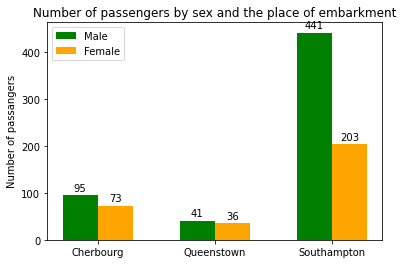

In [89]:
labels = ['Cherbourg', 'Queenstown', 'Southampton']
male = (data[(data['Sex'] == 'male') & (data['Embarked'] == 'Cherbourg')]['PassengerId'].count(),
        data[(data['Sex'] == 'male') & (data['Embarked'] == 'Queenstown')]['PassengerId'].count(),
        data[(data['Sex'] == 'male') & (data['Embarked'] == 'Southampton')]['PassengerId'].count())
        
female = (data[(data['Sex'] == 'female') & (data['Embarked'] == 'Cherbourg')]['PassengerId'].count(),
        data[(data['Sex'] == 'female') & (data['Embarked'] == 'Queenstown')]['PassengerId'].count(),
        data[(data['Sex'] == 'female') & (data['Embarked'] == 'Southampton')]['PassengerId'].count())


x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male, width, label='Male', color='green')
rects2 = ax.bar(x + width/2, female, width, label='Female',color='orange')

ax.set_ylabel('Number of passangers')
ax.set_title('Number of passengers by sex and the place of embarkment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height-2),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

#### Получается, что нет зависимости от порта, это скорее зависимость от пола и класса.

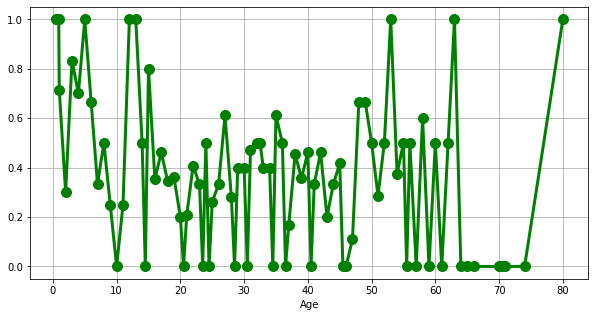

In [54]:
series = data.groupby(['Age'])['Survived'].sum() / data.groupby(['Age'])['Survived'].count()
series.plot(figsize=(10, 5), linestyle='-', marker='o', markersize=10, grid=True, lw=3, color = 'green')

#### Здесь, после анализа полученных нами диаграмм становится сложно оценить связь возраста с выживаемостью, так как распределение проихсдоит крайне неравномерно. Интерес также представляет результат гистограммы о семьей, судя по ее результатам, наибольшую вероятность выживания имели семьи, в которых было 2 или 3 человека. 

#### Один из параметров, который не упоминался нами ранее - титул, который был у человека, попробуем оценить, влиял ли он как-то на шанс выживания в катастрофе. 

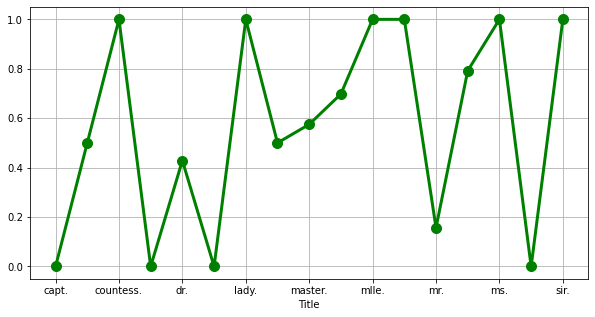

In [22]:
data['Title']=data['Name'].str.lower().str.extract('([a-z]*\.)', expand=True)
series = data.groupby(['Title'])['Survived'].sum() / data.groupby(['Title'])['Survived'].count()
series.plot(figsize=(10, 5), linestyle='-', marker='o', markersize=10, grid=True, lw=3, color = 'green')

In [23]:
data.Title.replace({'mlle.':'mme.', 'miss.':'ms.'}, inplace=True)
data.Title.replace({'capt.':'mil. title', 'col.':'mil. title', 'major.':'mil. title'}, inplace=True)
data.groupby('Title').size()

Title
countess.       1
don.            1
dr.             7
jonkheer.       1
lady.           1
master.        40
mil. title      5
mme.            3
mr.           517
mrs.          125
ms.           183
rev.            6
sir.            1
dtype: int64

#### В данном случае сложно говорить о влиянии титула на шанс выживания в катастфрофе, так как количество людей с определенными титулами несоизмеримо мало, по отношению к общему количеству человек на борту, интерес, однако, представляют rev., dr., остальные же титулы могут быть отражены в выживаемости по полу, семейному положению.

In [25]:
print('Общий процент выживших dr.: {} %'.format(int(100 * data[(data['Title'] == 'dr.')]['Survived'].sum() / data[(data['Title'] == 'dr.')].PassengerId.nunique())))
print('Общий процент выживших rev.: {} %'.format(int(100 * data[(data['Title'] == 'rev.')]['Survived'].sum() / data[(data['Title'] == 'rev.')].PassengerId.nunique())))

Общий процент выживших dr.: 42 %
Общий процент выживших rev.: 0 %


#### У докторов был довольно-таки высокий шанс на выживание - 42%. 

In [60]:
data[(data['Pclass'] == 1)]['Fare'].mean()

84.15468749999992

In [61]:
data[(data['Pclass'] == 2)]['Fare'].mean()

20.66218315217391

In [62]:
data[(data['Pclass'] == 3)]['Fare'].mean()

13.675550101832997

In [73]:
print('Общий процент выживших в первом классе в зависимости от того, заплатили ли они больше медианного значения за билет: {} %'.format(int(100 * data[(data['Fare'] > 84.155) & (data['Pclass'] == 1)]['Survived'].sum() / data[(data['Fare'] > 84.155) & (data['Pclass'] == 1)].PassengerId.nunique())))
print('Общий процент выживших в первом классе в зависимости от того, заплатили ли они меньше медианного значения за билет: {} %'.format(int(100 * data[(data['Fare'] <= 84.155) & (data['Pclass'] == 1)]['Survived'].sum() / data[(data['Fare'] <= 84.155) & (data['Pclass'] == 1)].PassengerId.nunique())))

Общий процент выживших в первом классе в зависимости от того, заплатили ли они больше медианного значения за билет: 77 %
Общий процент выживших в первом классе в зависимости от того, заплатили ли они меньше медианного значения за билет: 56 %


In [74]:
print('Общий процент выживших во втором классе в зависимости от того, заплатили ли они больше медианного значения за билет: {} %'.format(int(100 * data[(data['Fare'] > 20.66) & (data['Pclass'] == 2)]['Survived'].sum() / data[(data['Fare'] > 20.66) & (data['Pclass'] == 2)].PassengerId.nunique())))
print('Общий процент выживших во втором классе в зависимости от того, заплатили ли они больше медианного значения за билет: {} %'.format(int(100 * data[(data['Fare'] <= 20.66) & (data['Pclass'] == 2)]['Survived'].sum() / data[(data['Fare'] <= 20.66) & (data['Pclass'] == 2)].PassengerId.nunique())))

Общий процент выживших во втором классе в зависимости от того, заплатили ли они больше медианного значения за билет: 56 %
Общий процент выживших во втором классе в зависимости от того, заплатили ли они больше медианного значения за билет: 40 %


In [75]:
print('Общий процент выживших в третьем классе в зависимости от того, заплатили ли они больше медианного значения за билет: {} %'.format(int(100 * data[(data['Fare'] > 13.68) & (data['Pclass'] == 3)]['Survived'].sum() / data[(data['Fare'] > 13.68) & (data['Pclass'] == 3)].PassengerId.nunique())))
print('Общий процент выживших в третьем классе в зависимости от того, заплатили ли они больше медианного значения за билет: {} %'.format(int(100 * data[(data['Fare'] <= 13.68) & (data['Pclass'] == 3)]['Survived'].sum() / data[(data['Fare'] <= 13.68) & (data['Pclass'] == 3)].PassengerId.nunique())))

Общий процент выживших в третьем классе в зависимости от того, заплатили ли они больше медианного значения за билет: 26 %
Общий процент выживших в третьем классе в зависимости от того, заплатили ли они больше медианного значения за билет: 23 %


#### Сложно говорить о зависимости выживаеости от суммы, которую человек заплатил на билет для третьего класса, но во втором и первом: люди, заплатившие больше медианного значения имели больший шанс на выживание. 

#### По итогу, можно утверждать, что выживаемость зависит от многих фактор, в большинстве своем работающих в связке с другими параметрами, как пол и возраст. 